## Assignment 4

By Siddharth Sundararajan and Nitin Reddy

In [1]:
# Installing the required packages
install.packages("matlib")
library(matlib)

Installing package into 'C:/Users/nitin/OneDrive/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'matlib' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nitin\AppData\Local\Temp\RtmpyIYYzl\downloaded_packages


In [2]:
# Writing the required symbols
mu=intToUtf8(0x03BC)
sigma=intToUtf8(0x03C3)
varcovar = intToUtf8(0x03A3)
alpha = intToUtf8(0x03B1)
beta = intToUtf8(0x03B2)
lambda = intToUtf8(0x03BB)

In [3]:
# MLE for all the functions

# Bernoulli function
bernoulli.mle <- function(x) {
  p <- mean(x)
  cat("BERNOULLI DISTRIBUTION \n")
  cat("The population estimate for bernoulli distribution is : p = ", p, "\n")
  cat("\n")
  return(p)
}

# Binomial function
binomial.mle <- function(x) {
  p <- mean(x)
  n <- length(x)
  cat("BINOMIAL DISTRIBUTION \n")
  cat("The population estimate for binomial distribution is : n = ", n,
      ", p = ", p, "\n")
  cat("\n")
  return(c(n,p))
}

# Geometric function
geometric.mle <- function(x) {
  p <- 1/(mean(x))
  cat("GEOMETRIC DISTRIBUTION \n")
  cat("The population estimate for geometric distribution is : p = ", p, "\n")
  cat("\n")
  return(p)
}

# Poisson function
poisson.mle <- function(x) {
  lambda.val <- mean(x)
  cat("POISSON DISTRIBUTION \n")
  cat("The population estimate for poisson distribution is : ", lambda,
      " = ", lambda.val, "\n")
  cat("\n")
  return(lambda.val)
}

# Uniform function
uniform.mle <- function(x) {
  a <- min(x)
  b <- max(x)
  cat("UNIFORM DISTRIBUTION \n")
  cat("The population estimate for uniform distribution are : a = ", a,
      ", b = ", b, "\n")
  cat("\n")
  return(c(a,b))
}

# Normal function
normal.mle <- function(x) {
  mu.val <- mean(x)
  sigma.val <- sum(((x - mean(x))^2))/length(x)
  cat("NORMAL DISTRIBUTION \n")
  cat("The population estimate for normal distribution are : ", mu, " = ",
      mu.val, ", ", sigma, " = ", sigma.val, "\n")
  cat("\n")
  return(c(mu.val,sigma.val))
}

# Exponential function
exponential.mle <- function(x) {
  beta.val <- mean(x)
  cat("EXPONENTIAL DISTRIBUTION \n")
  cat("The population estimate for exponential distribution is : ", beta,
      " = ", beta.val, "\n")
  cat("\n")
  return(beta.val)
}

# Gamma function
gamma.mle <- function(x) {
  cat("GAMMA DISTRIBUTION \n")
  mean.val <- mean(x)
  s <- log(mean.val) - ((sum(log(x)))/length(x))
  alpha.val <- (3 - s + sqrt( ((s-3)^2) + (24 * s) ))/(12 * s)
  beta.val <- mean.val/alpha.val
  cat("The population estimate for gamma distribution is : ", alpha, " = ",
      alpha.val, ", ", beta, " = ", beta.val, "\n")
  cat("\n")
  return(c(alpha.val,beta.val))
}

# Beta function
beta.mle <- function(x) {
  cat("BETA DISTRIBUTION \n")
  iter = 100
  # Initial values for alpha and beta are from the MOM estimator
  x.mean <- mean(x)
  x.var <- (sum(x * x))/length(x)
  alpha.val <- ((x.mean ^ 2) - (x.mean * x.var))/(x.var - (x.mean ^ 2))
  beta.val <- (alpha.val * (1 - x.mean))/(x.mean)
  # Numerical approximation
  final.val <- c(alpha.val, beta.val)
  for (i in 1:100) {
    g1 <- digamma(alpha.val) - digamma(alpha.val + beta.val)
      - (sum(log(x))/length(x))
    g2 <- digamma(beta.val) - digamma(alpha.val + beta.val)
      - (sum(log(1-x))/length(x))
    g.val <- c(g1, g2)
    # Matrix G terms
    term.11 <- trigamma(alpha.val) - trigamma(alpha.val + beta.val)
    term.12 <- -trigamma(alpha.val + beta.val)
    term.22 <- trigamma(beta.val) - trigamma(alpha.val + beta.val)
    G <- matrix(c(term.11, term.12, term.12, term.22),
                nrow = 2, ncol = 2, byrow = TRUE)
    G.inv <- inv(G)
    # Final values
    final.val <- final.val - t(G.inv %*% g.val)
    alpha.val <- final.val[1]
    beta.val <- final.val[2]
  }
  cat("The population estimate for beta distribution is : ", alpha, " = ",
      alpha.val, ", ", beta, " = ", beta.val, "\n")
  cat("\n")
  return(c(c(alpha.val,beta.val)))
}

# Chisquare function
chisquare.mle <- function(x) {
  cat("CHISQUARE DISTRIBUTION \n")
  # Intitial values for v from MOM estimator
  p.tilda <- mean(x)
  # Some approximation using second derivative
  n <- length(x)
  p.del.numerator <- (-n/gamma(p.tilda/2) * digamma(p.tilda/2))
    - (((n * log(2)) + sum(log(x)))/2)
  p.del.denominator <- (-n * trigamma(p.tilda/2)/4)
  p.del <- p.del.numerator/p.del.denominator
  # Not sure here
  p.val <- (p.tilda + p.del)/2
  cat("The population estimate for student-t distribution is : 
        p(degrees of freedom) = ", p.val, "\n")
  cat("\n")
  return(p.val)
}

In [ ]:
# Enter distribution name
cat("1. Bernoulli Distribution \n")
cat("2. Binomial Distribution \n")
cat("3. Geometric Distribution \n")
cat("4. Poisson Distribution \n")
cat("5. Uniform Distribution \n")
cat("6. Normal Distribution \n")
cat("7. Exponential Distribution \n")
cat("8. Gamma Distribution \n")
cat("9. Beta Distribution \n")
cat("10. Chi-square Distribution \n")
in.val <- as.integer(readline(prompt = "Please select the distribution
                    (Enter the number) \n"))

In [ ]:
# Taking sample input data from the user or 
# asking user to input parameters to a R function
cat("\n Please select one option : \n")
cat(" 1. Enter data \n")
cat(" 2. Create data using function in R \n")
in.val.2 <- as.integer(readline(prompt = "Enter the number \n"))

if(in.val.2 == 1) {
  my.input <- readline(prompt 
                       = "Please enter the sample data separated with commas \n")
  x <- as.double(strsplit(my.input, ",")[[1]])
} else {
  obs.input <- as.integer(readline(prompt 
                    = "Please enter the number of observations(n) : \n"))
  if(in.val == 1) {
    value <- as.double(readline(prompt = "Please enter the value of p : \n"))
    x <- rbinom(obs.input, 1, value)
  }
  else if(in.val == 2) {
    value <- as.double(readline(prompt = "Please enter the value of p : \n"))
    value2 <- as.double(readline(prompt = "Please enter the value of n : \n"))
    x <- rbinom(obs.input,n = value2,prob = value)
  }
  else if(in.val == 3) {
    value <- as.double(readline(prompt = "Please enter the value of p : \n"))
    x <- rgeom(obs.input, value)
  }
  else if(in.val == 4) {
    value <- as.double(readline(prompt = "Please enter the value of lambda : \n"))
    x <- rpois(obs.input, value)
  }
  else if(in.val == 5) {
    value <- as.double(readline(prompt = "Please enter the value of a : \n"))
    value2 <- as.double(readline(prompt = "Please enter the value of b : \n"))
    x <- runif(obs.input, value, value2)
  }
  else if(in.val == 6) {
    value <- as.double(readline(prompt = "Please enter the value of mu : \n"))
    value <- as.double(readline(prompt = "Please enter the value of sigma^2 : \n"))
    x <- rnorm(obs.input, value, value2)
  }
  else if(in.val == 7) {
    value <- as.double(readline(prompt = "Please enter the value of beta : \n"))
    x <- rexp(obs.input, value)
  }
  else if(in.val == 8) {
    value <- as.double(readline(prompt = "Please enter the value of alpha : \n"))
    value <- as.double(readline(prompt = "Please enter the value of beta : \n"))
    x <- rgamma(obs.input,shape = value, scale =value2)
  }
  else if(in.val == 9) {
    value <- as.double(readline(prompt = "Please enter the value of alpha : \n"))
    value <- as.double(readline(prompt = "Please enter the value of beta : \n"))
    x <- rbeta(obs.input,shape1 = value, shape2 = value2)
  }
  else if(in.val == 10) {
    value <- as.double(readline(prompt = "Please enter the value of p : \n"))
    x <- rchisq(obs.input, value)
  }
}

In [42]:
# MLE based on input given by the user
if (in.val == 1) {
  bernoulli.mle(x)
} else if (in.val == 2) {
  binomial.mle(x)
} else if (in.val == 3) {
  geometric.mle(x)
} else if (in.val == 4) {
  poisson.mle(x)
} else if (in.val == 5) {
  uniform.mle(x)
} else if (in.val == 6) {
  normal.mle(x)
} else if (in.val == 7) {
  exponential.mle(x)
} else if (in.val == 8) {
  gamma.mle(x)
} else if (in.val == 9) {
  beta.mle(x)
} else if (in.val == 10) {
  chisquare.mle(x)
}

CHISQUARE DISTRIBUTION 
The population estimate for student-t distribution is : p(degrees of freedom) =  8.915059 



[1] 8.915059

### Parametric bootstrap with KS Test

In [43]:
# Function for parametric bootstrap with ks test
#************************************************#
#nboot = number of iterations for bootstrap#
#val = value of parameter 1#
#val2 = value of parameter 2#
#n = number of observations for the distribution#
#in.val.n = distribution selected by the user#
#************************************************#
ks.test.bootstrap.mle <- function(nboot = 10000, val, val2 = 0, n = 10000, in.val.n) 
{
  D.vec <- NULL
  if (in.val.n == 1) {
    func.mle <- bernoulli.mle
    func <- rbinom
    term <- "rbinom"
  } else if (in.val.n == 2) {
    func.mle <- binomial.mle
    func <- rbinom
    term <- "rbinom"
  } else if (in.val.n == 3) {
    func.mle <- geometric.mle
    func <- rgeom
    term <- "rgeom"
  } else if (in.val.n == 4) {
    func.mle <- poisson.mle
    func <- rpois
    term <- "rpois"
  } else if (in.val.n == 5) {
    func.mle <- uniform.mle
    func <- runif
    term <- "runif"
  } else if (in.val.n == 6) {
    func.mle <- normal.mle
    func <- rnorm
    term <- "rnorm"
  } else if (in.val.n == 7) {
    func.mle <- exponential.mle
    func <- rexp
    term <- "rexp"
  } else if (in.val.n == 8) {
    func.mle <- gamma.mle
    func <- rgamma
    term <- "rgamma"
  } else if (in.val.n == 9) {
    func.mle <- beta.mle
    func <- rbeta
    term <- "rbeta"
  } else if (in.val.n == 10) {
    func.mle <- chisquare.mle
    func <- rchisq
    term <- "rchisq"
  }
  for(i in 1:nboot) {
    if (in.val.n == 3 | in.val.n == 4 | in.val.n == 7 | in.val.n == 10) {
      vecb <- func(n, val)
      est.val <- func.mle(vecb)
      D.vec <- c(D.vec, unname(ks.test(vecb, term, est.val)$statistic))
    } else {
      if (in.val.n == 1) {val = 1}
      vecb <- func(n, val, val2) 
      est.val <- func.mle(vecb)
      if (in.val.n == 1) {
        est.val[2] = est.val[1]
        est.val[1] = 1}
      D.vec <- c(D.vec, unname(ks.test(vecb, term,
                                       est.val[1], est.val[2])$statistic))
    }
  }
  list(D.values = D.vec)
}

In [73]:
# Enter distribution name for which goodness of fit test has to be done
cat("1. Bernoulli Distribution \n")
cat("2. Binomial Distribution \n")
cat("3. Geometric Distribution \n")
cat("4. Poisson Distribution \n")
cat("5. Uniform Distribution \n")
cat("6. Normal Distribution \n")
cat("7. Exponential Distribution \n")
cat("8. Gamma Distribution \n")
cat("9. Beta Distribution \n")
cat("10. Chi-square Distribution \n")
in.val.bootstrap <- as.integer(readline(prompt =
                "Please select the distribution (Enter the number) \n"))

1. Bernoulli Distribution 
2. Binomial Distribution 
3. Geometric Distribution 
4. Poisson Distribution 
5. Uniform Distribution 
6. Normal Distribution 
7. Exponential Distribution 
8. Gamma Distribution 
9. Beta Distribution 
10. Chi-square Distribution 
Please select the distribution (Enter the number) 
10


In [ ]:
# D value or the statistic from the the function written earlier
#************************************************#
#nboot = number of iterations for bootstrap#
#val = value of parameter 1#
#val2 = value of parameter 2#
#n = number of observations for the distribution#
#in.val.n = distribution selected by the user#
#************************************************#
d.values <- as.numeric(unlist(ks.test.bootstrap.mle(nboot = 10000,
                            val = 6,val2 = 0.6, n = 1000, in.val.bootstrap)))

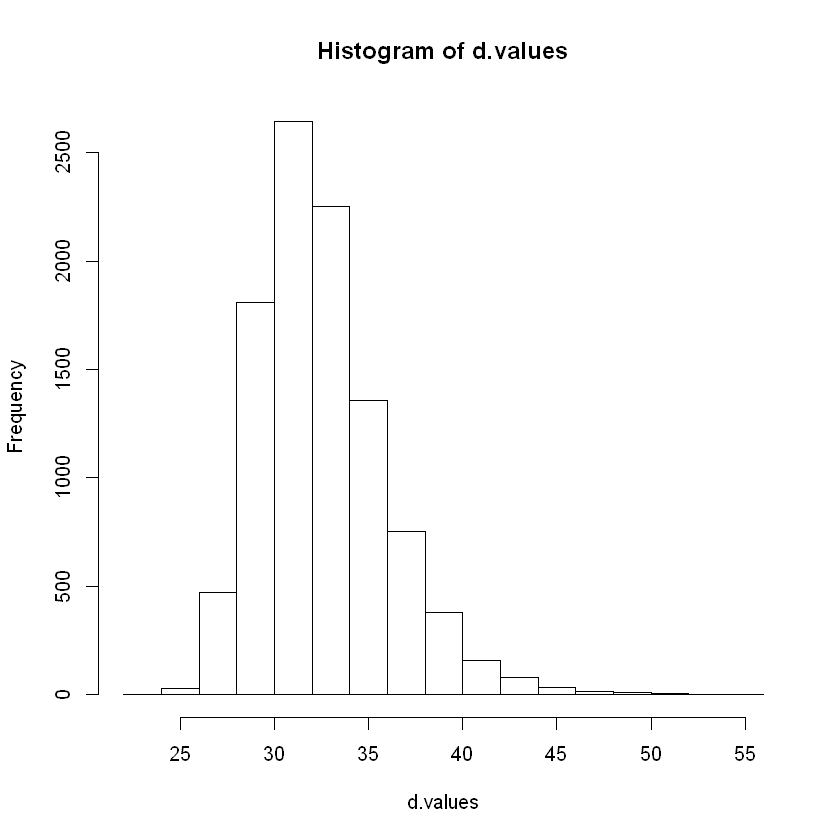

In [75]:
# Plot the histogram of the d values
hist(d.values)

### Observations

In case of Binomial distribution and Chi-square distribution the d-values observed are high. This is because the MLE estimates observed is seen to be really high. For other distributions we observe low values of the statistic from the ks.test function.